## Code to optimize a curve fit for log(P_c) using b*log(1-exp(x-a))+c, uses least squares

In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import scipy.special as scipy

In [2]:
df = pd.read_csv('/homes/fed1/Survival_Franny/formatted_net_SEER_survival_by_cause_age_sex_year.csv')

In [3]:
df['t'] = df['interval']+1

df = df[df.year==0]
df = df[df.sex==3]
df = df[df.age_name=="All Ages"]

df['P_c'] = 1 - df['net_survival']

In [4]:
#with_P_c = df[df.t==1]
for cancer in df.cause_name.unique():
    index_1 = (df.cause_name==cancer)
    df.loc[(index_1)&(df.t>1), 'P_c']=1-df.net_survival[index_1].values[1:]/df.net_survival[index_1].values[:-1]
    #with_P_c = pd.merge(with_P_c, df_cause, how='outer')

In [8]:
df = df.dropna()
df = df[df['P_c']!=0]
df['logit_P_c'] = scipy.logit(df['P_c'])

In [9]:
# define the functional form to fit
def function(x,t):
    return x[1]*np.log(1 + np.exp(-(t-x[0])))+x[2]

def model(x, t, y):
    return function(x,t)-y

In [10]:
# starting values
x_0 = np.array([1.0,1.0,1.0])

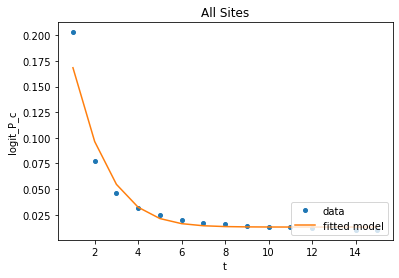

  cause_name        a         b         c
0  All Sites  5.13551  0.658518 -4.330899


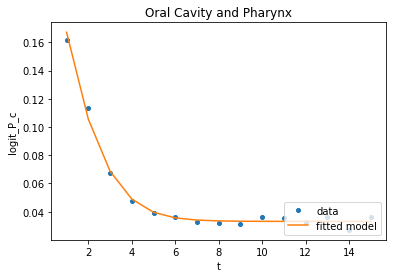

                cause_name         a         b         c
0  Oral Cavity and Pharynx  4.031271  0.574437 -3.373683


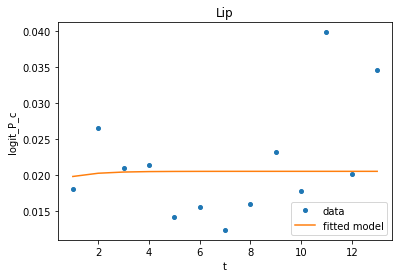

  cause_name        a           b         c
0        Lip -7.66381 -209.368818 -3.866425


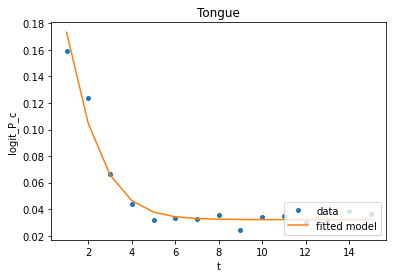

  cause_name         a         b         c
0     Tongue  3.788124  0.647685 -3.406796


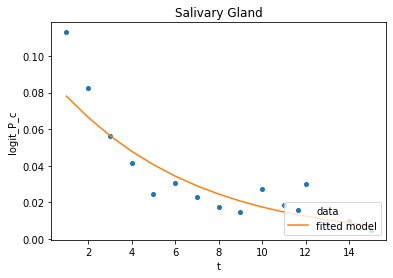

       cause_name          a         b          c
0  Salivary Gland  50.762441  0.173058 -11.080413


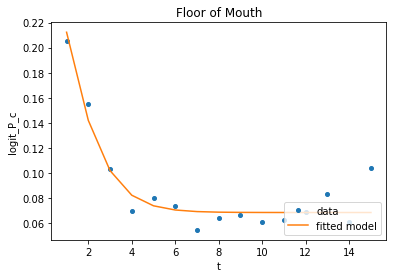

       cause_name         a         b         c
0  Floor of Mouth  3.082962  0.591723 -2.613194


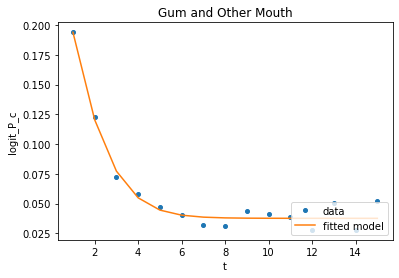

            cause_name         a         b         c
0  Gum and Other Mouth  3.890736  0.617467 -3.242861


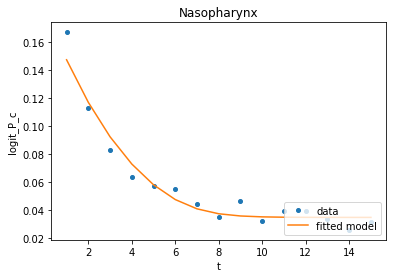

    cause_name         a         b         c
0  Nasopharynx  6.876583  0.267858 -3.330799


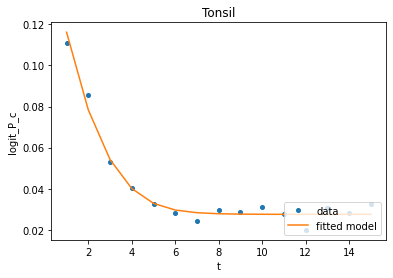

  cause_name         a         b         c
0     Tonsil  4.273971  0.463877 -3.565362


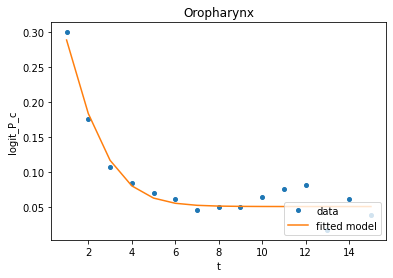

   cause_name         a         b         c
0  Oropharynx  4.145885  0.633152 -2.919162


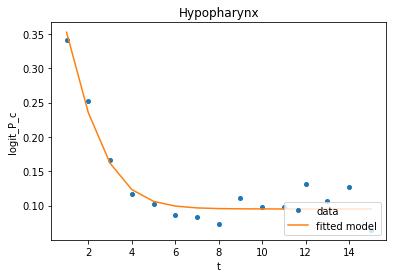

    cause_name         a        b         c
0  Hypopharynx  3.421591  0.65638 -2.253937


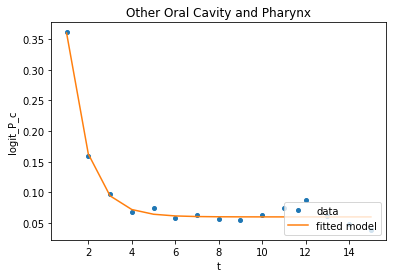

                      cause_name        a         b         c
0  Other Oral Cavity and Pharynx  1.80576  1.851207 -2.751511


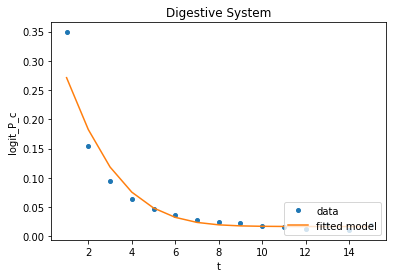

         cause_name         a         b         c
0  Digestive System  7.027787  0.513808 -4.086581


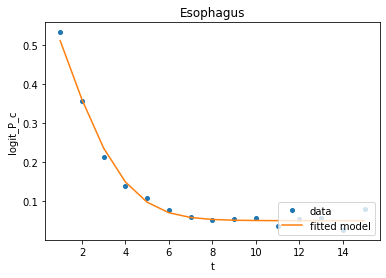

  cause_name         a         b         c
0  Esophagus  5.764465  0.627466 -2.949353


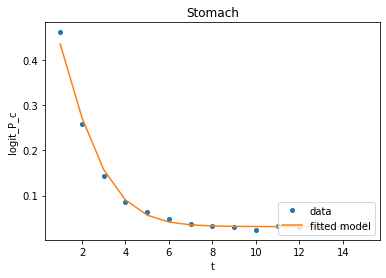

  cause_name         a         b        c
0    Stomach  5.275841  0.741492 -3.43761


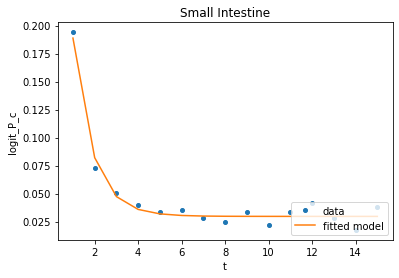

        cause_name         a         b         c
0  Small Intestine  2.007756  1.539312 -3.488168


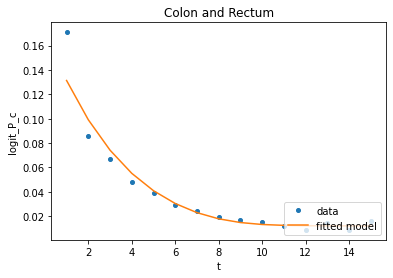

         cause_name         a         b         c
0  Colon and Rectum  8.926807  0.318242 -4.411596


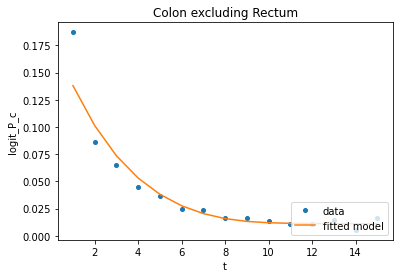

               cause_name        a         b         c
0  Colon excluding Rectum  8.56044  0.351549 -4.490562


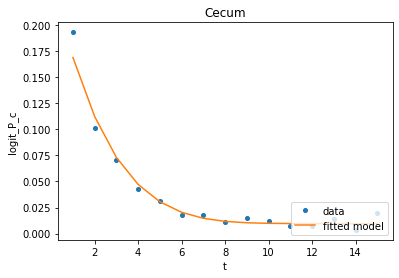

  cause_name         a        b         c
0      Cecum  7.400295  0.47619 -4.642722


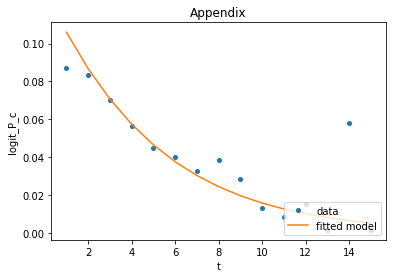

  cause_name          a         b          c
0   Appendix  39.713915  0.221493 -10.707507


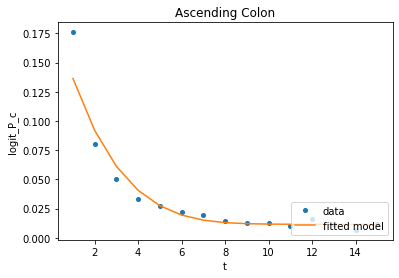

        cause_name         a         b         c
0  Ascending Colon  6.835424  0.447688 -4.459423


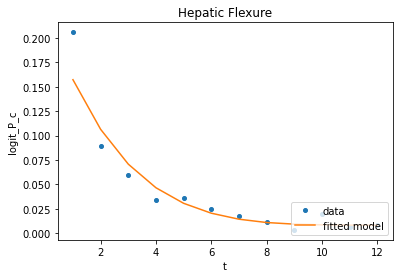

        cause_name         a         b         c
0  Hepatic Flexure  7.959757  0.449808 -4.809036


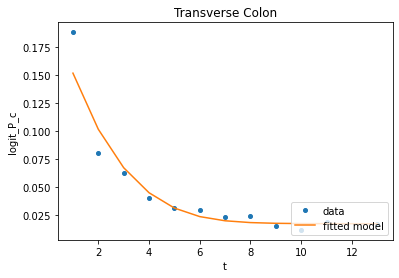

         cause_name         a         b         c
0  Transverse Colon  5.992079  0.463315 -4.038697


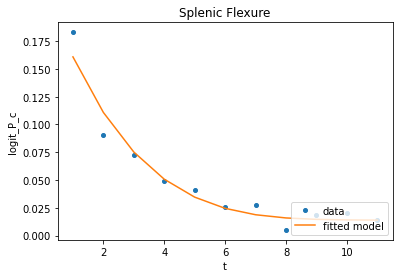

        cause_name         a         b        c
0  Splenic Flexure  7.063149  0.432196 -4.27367


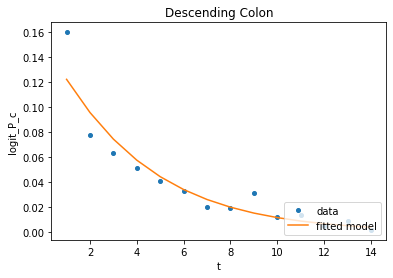

         cause_name          a         b          c
0  Descending Colon  39.182057  0.274839 -12.464714


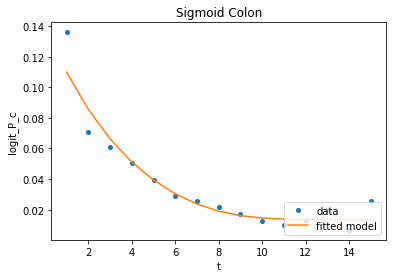

      cause_name        a        b      c
0  Sigmoid Colon  8.97938  0.27712 -4.303


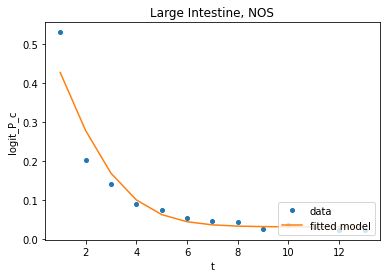

             cause_name         a         b         c
0  Large Intestine, NOS  5.679592  0.668752 -3.426578


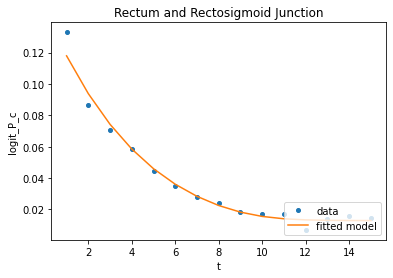

                         cause_name          a         b         c
0  Rectum and Rectosigmoid Junction  10.104934  0.255518 -4.338493


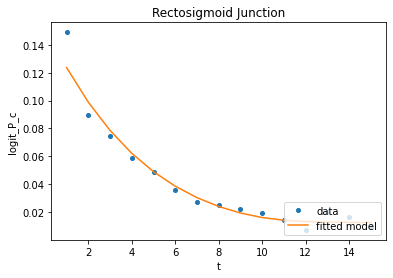

              cause_name          a         b        c
0  Rectosigmoid Junction  10.556815  0.252194 -4.36814


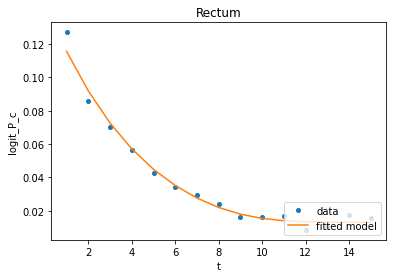

  cause_name         a         b         c
0     Rectum  9.924918  0.256271 -4.322355


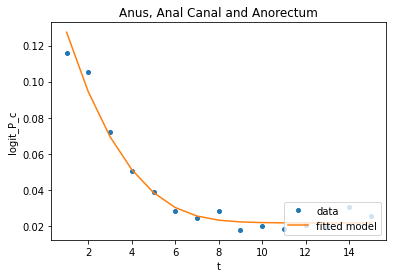

                       cause_name         a         b         c
0  Anus, Anal Canal and Anorectum  6.552111  0.339446 -3.810239


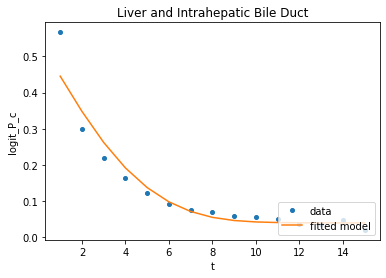

                         cause_name         a         b         c
0  Liver and Intrahepatic Bile Duct  8.288451  0.409316 -3.202851


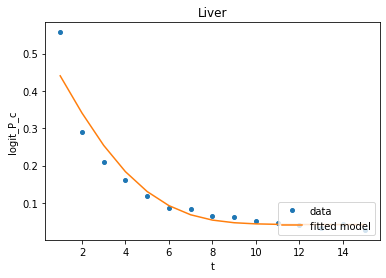

  cause_name         a         b         c
0      Liver  7.876811  0.419827 -3.127284


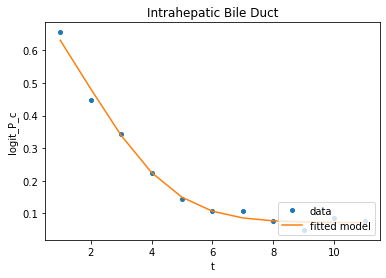

               cause_name        a         b         c
0  Intrahepatic Bile Duct  6.04292  0.614705 -2.564662


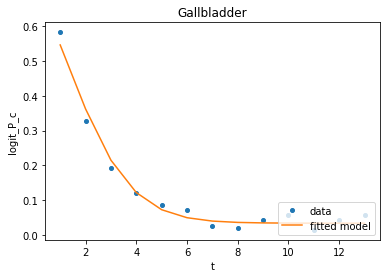

    cause_name         a         b        c
0  Gallbladder  5.651321  0.764513 -3.37708


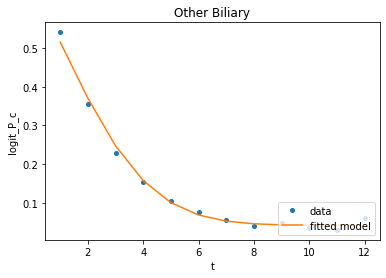

      cause_name         a         b         c
0  Other Biliary  6.364069  0.596418 -3.140192


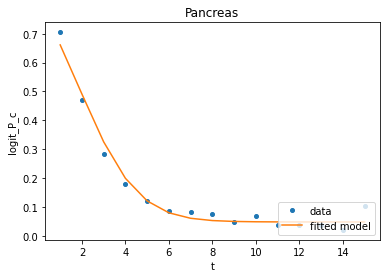

  cause_name         a         b         c
0   Pancreas  6.139785  0.712413 -2.997631


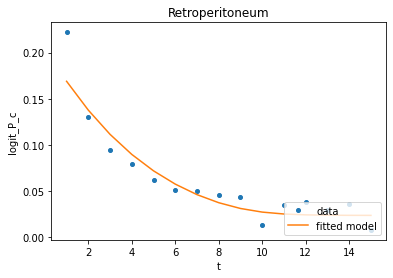

        cause_name        a         b         c
0  Retroperitoneum  9.79458  0.241257 -3.715104


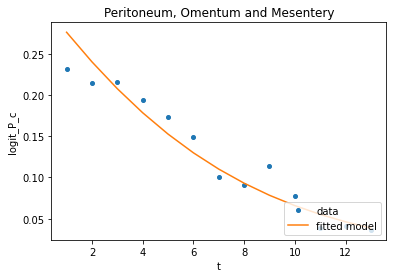

                          cause_name        a         b          c
0  Peritoneum, Omentum and Mesentery  55.9115  0.187611 -11.265845


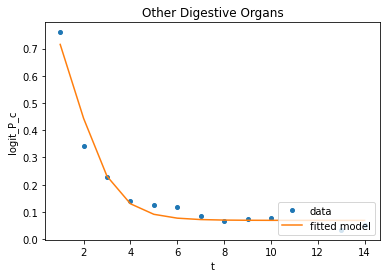

               cause_name         a         b        c
0  Other Digestive Organs  3.683556  1.281753 -2.60309


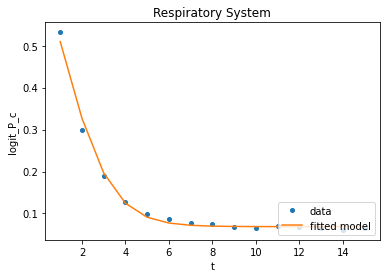

           cause_name         a         b         c
0  Respiratory System  4.217895  0.812367 -2.606894


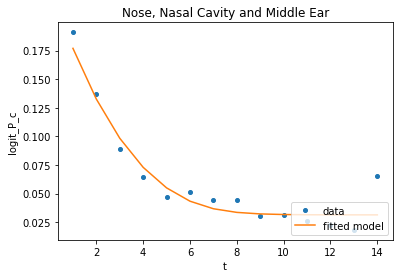

                          cause_name        a        b         c
0  Nose, Nasal Cavity and Middle Ear  6.50194  0.34377 -3.430096


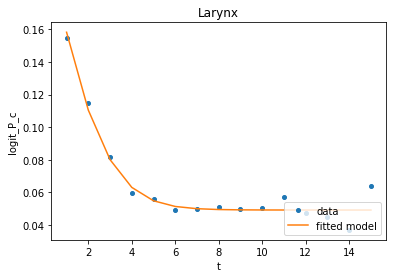

  cause_name         a         b         c
0     Larynx  3.741141  0.459949 -2.960778


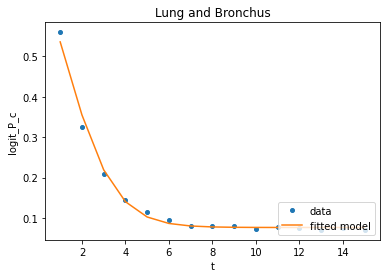

          cause_name         a         b         c
0  Lung and Bronchus  4.314071  0.786404 -2.489746


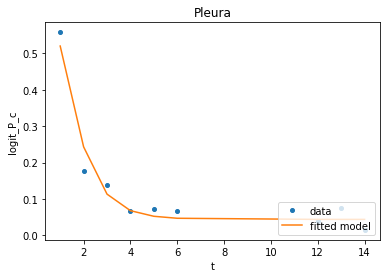

  cause_name         a         b         c
0     Pleura  2.977252  1.500279 -3.080575


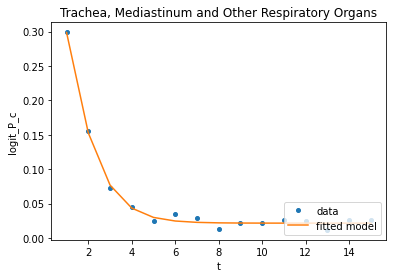

                                          cause_name         a         b  \
0  Trachea, Mediastinum and Other Respiratory Organs  4.177213  0.921481   

          c  
0 -3.819375  


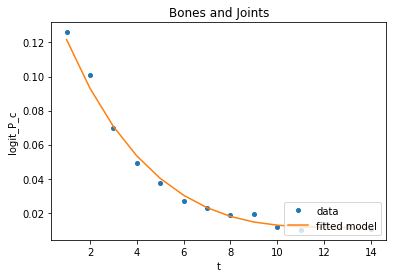

         cause_name         a         b         c
0  Bones and Joints  9.327603  0.300218 -4.476718


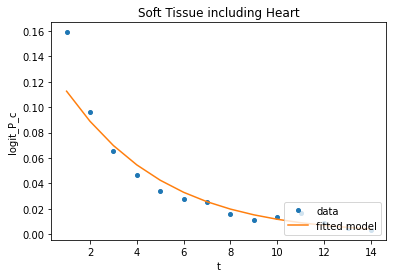

                    cause_name          a         b          c
0  Soft Tissue including Heart  53.754982  0.262283 -15.901026


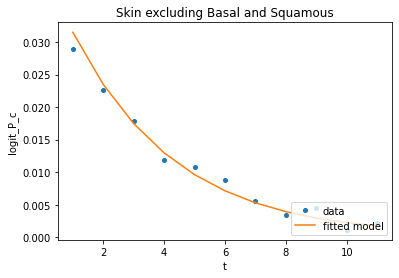

                          cause_name          a         b         c
0  Skin excluding Basal and Squamous  11.840978  0.302279 -6.702657


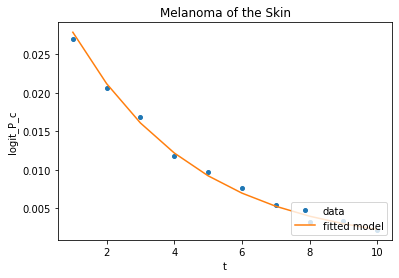

             cause_name          a         b          c
0  Melanoma of the Skin  35.267145  0.280506 -13.165467


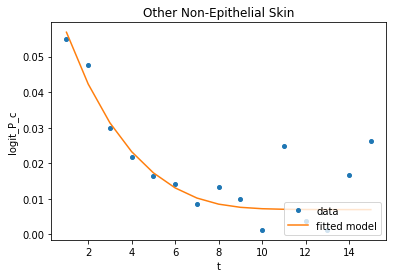

                  cause_name         a         b         c
0  Other Non-Epithelial Skin  7.901521  0.311795 -4.961017


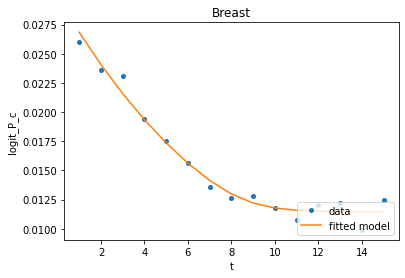

  cause_name         a         b         c
0     Breast  8.746104  0.111943 -4.457796


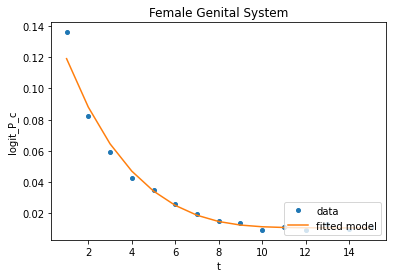

              cause_name         a         b         c
0  Female Genital System  8.502988  0.337006 -4.529922


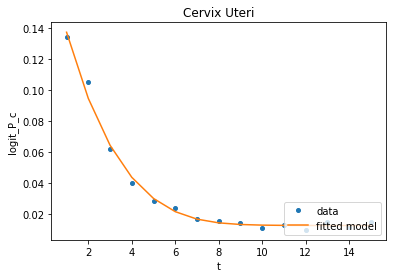

     cause_name         a         b         c
0  Cervix Uteri  6.971553  0.422925 -4.364101


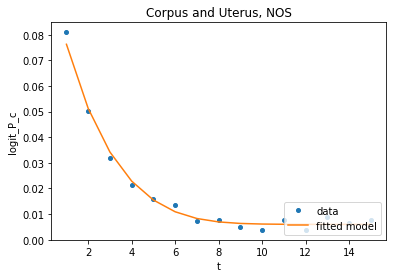

               cause_name         a         b         c
0  Corpus and Uterus, NOS  7.153558  0.426078 -5.116583


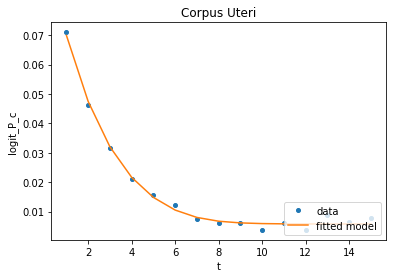

     cause_name         a         b         c
0  Corpus Uteri  7.203451  0.413063 -5.151421


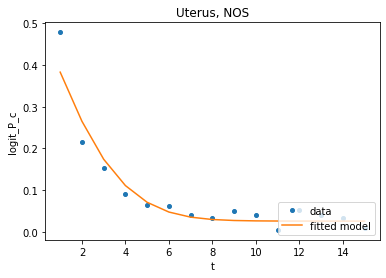

    cause_name         a         b         c
0  Uterus, NOS  6.804492  0.545808 -3.646021


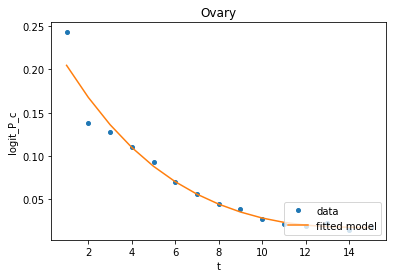

  cause_name          a         b         c
0      Ovary  11.958017  0.244756 -4.038601


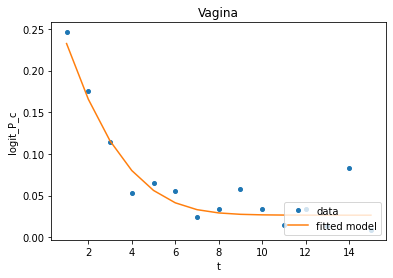

  cause_name         a         b         c
0     Vagina  6.671562  0.424681 -3.604702


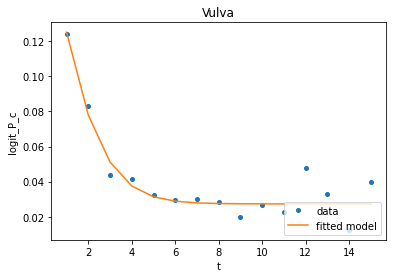

  cause_name         a        b         c
0      Vulva  3.713216  0.58567 -3.572123


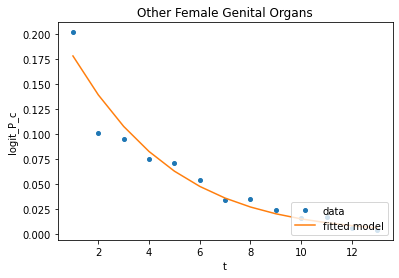

                    cause_name         a         b          c
0  Other Female Genital Organs  33.30702  0.292475 -10.977067


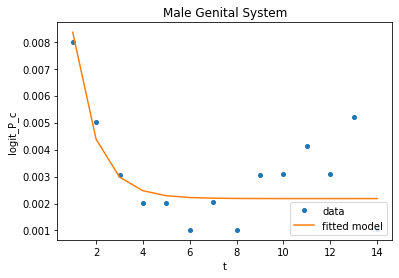

            cause_name         a         b         c
0  Male Genital System  1.896147  1.088506 -6.124943


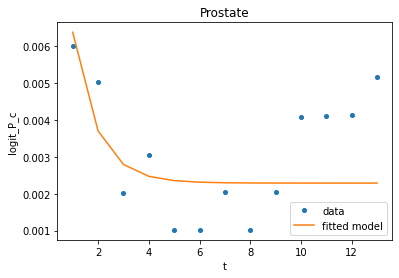

  cause_name         a         b         c
0   Prostate  1.261099  1.238097 -6.077656


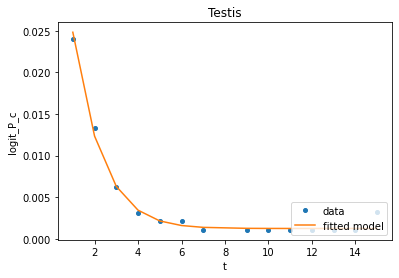

  cause_name       a         b         c
0     Testis  5.1282  0.731963 -6.703719


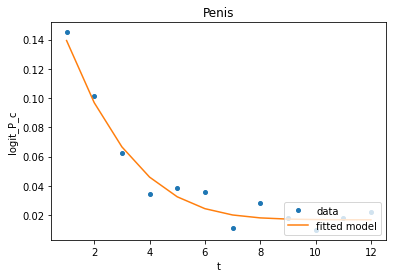

  cause_name         a         b         c
0      Penis  6.416429  0.415224 -4.071864


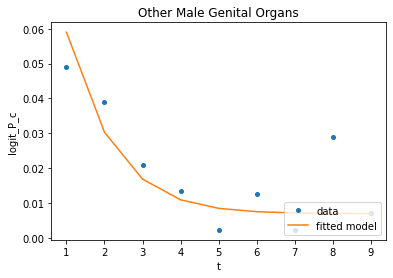

                  cause_name         a         b         c
0  Other Male Genital Organs  3.799633  0.768696 -4.966523


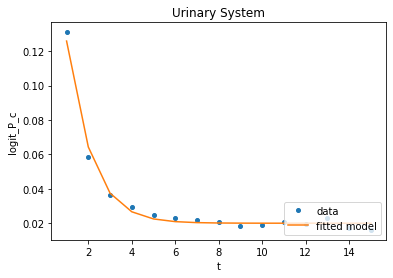

       cause_name         a         b        c
0  Urinary System  3.041547  0.901901 -3.88926


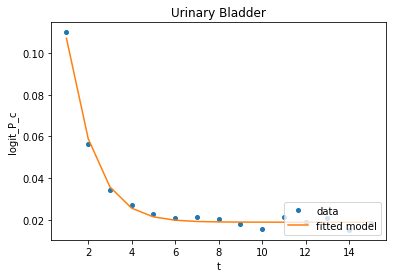

        cause_name        a         b         c
0  Urinary Bladder  3.32084  0.757416 -3.949472


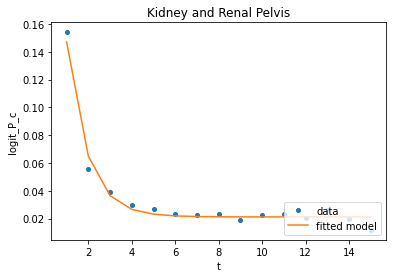

                cause_name         a         b         c
0  Kidney and Renal Pelvis  2.387996  1.288105 -3.832978


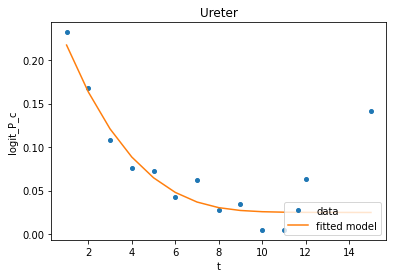

  cause_name         a         b         c
0     Ureter  7.773319  0.352262 -3.668074


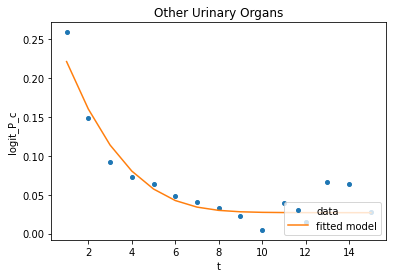

             cause_name         a         b         c
0  Other Urinary Organs  6.823906  0.400259 -3.590567


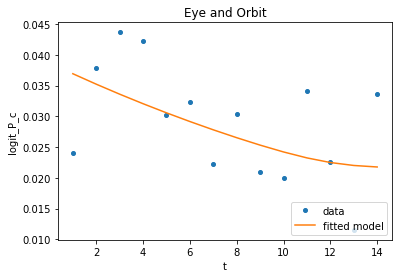

      cause_name          a         b         c
0  Eye and Orbit  12.298629  0.048867 -3.813391


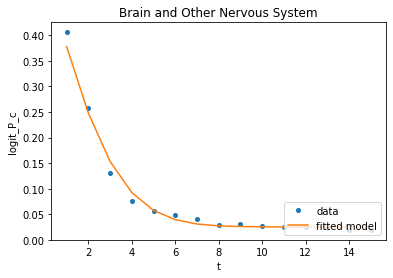

                       cause_name         a         b         c
0  Brain and Other Nervous System  6.117908  0.617729 -3.661802


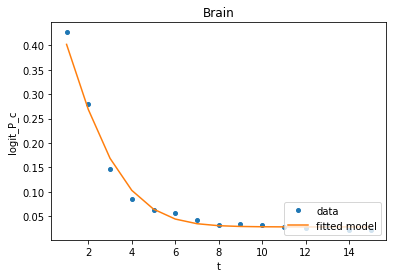

  cause_name         a         b         c
0      Brain  6.147987  0.610337 -3.542132


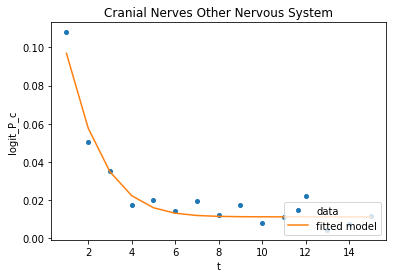

                            cause_name         a         b         c
0  Cranial Nerves Other Nervous System  4.864368  0.581728 -4.491958


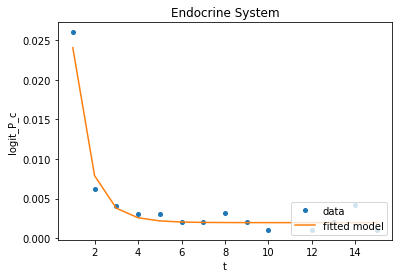

         cause_name         a         b         c
0  Endocrine System  2.278388  1.655461 -6.226469


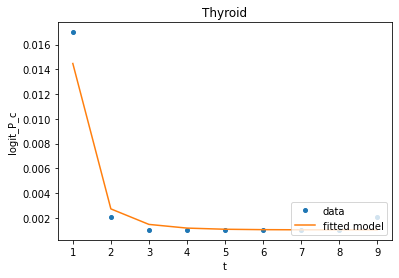

  cause_name         a             b         c
0    Thyroid -7.904494  19621.076159 -6.884873


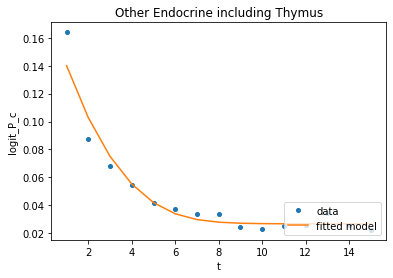

                         cause_name         a         b         c
0  Other Endocrine including Thymus  6.000729  0.356023 -3.597746


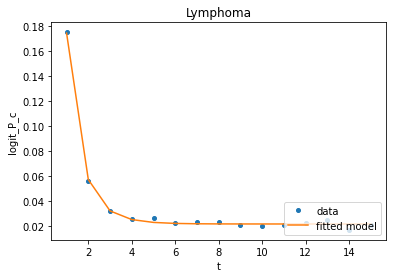

  cause_name         a         b         c
0   Lymphoma  0.931322  3.435402 -3.820678


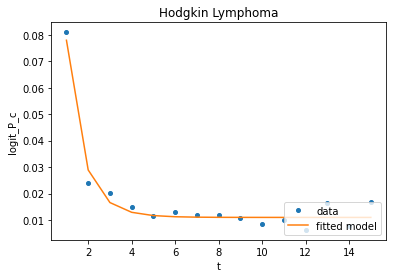

         cause_name         a         b         c
0  Hodgkin Lymphoma  1.492151  2.095729 -4.501473


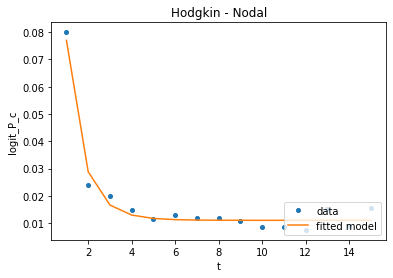

        cause_name         a         b         c
0  Hodgkin - Nodal  1.506411  2.061037 -4.499378


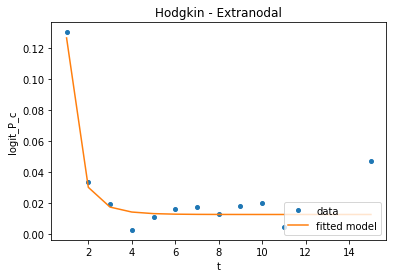

             cause_name         a           b        c
0  Hodgkin - Extranodal -6.980452  7149.09501 -4.37895


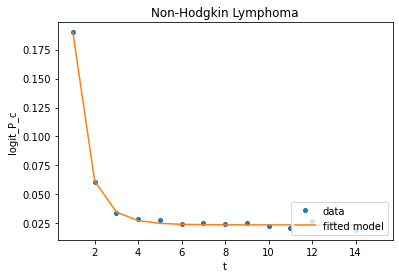

             cause_name         a         b         c
0  Non-Hodgkin Lymphoma  0.765871  3.889172 -3.720703


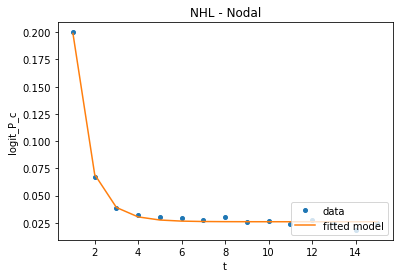

    cause_name        a         b         c
0  NHL - Nodal  1.13505  2.921564 -3.622343


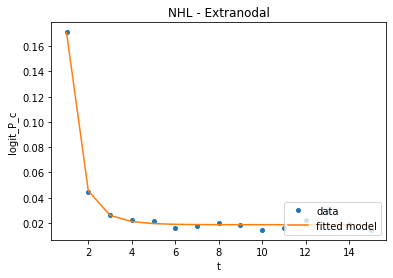

         cause_name         a          b         c
0  NHL - Extranodal -0.809468  15.708702 -3.963101


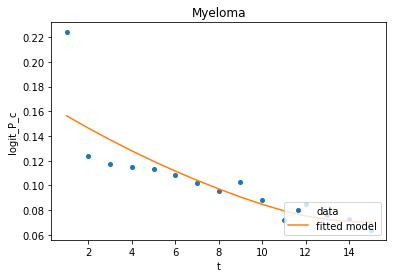

  cause_name         a        b         c
0    Myeloma  12.65617  0.07778 -2.591638


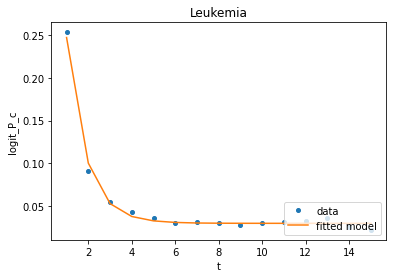

  cause_name         a         b         c
0   Leukemia  2.169122  1.638253 -3.474119


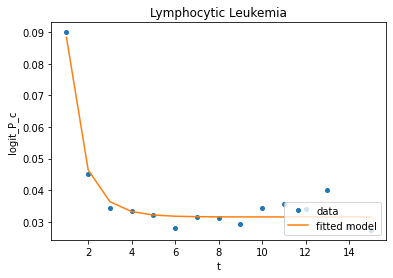

             cause_name         a           b         c
0  Lymphocytic Leukemia -7.404732  4874.75977 -3.424094


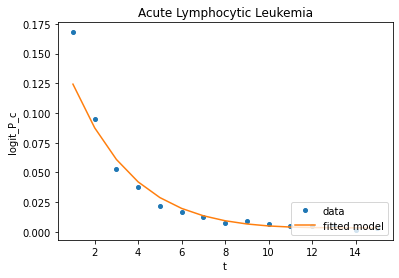

                   cause_name          a        b         c
0  Acute Lymphocytic Leukemia  10.599583  0.39187 -5.714212


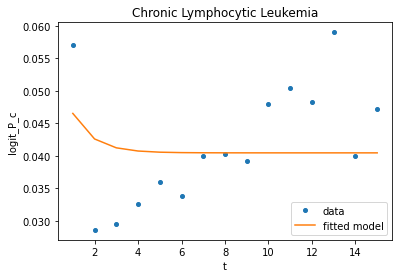

                     cause_name         a            b        c
0  Chronic Lymphocytic Leukemia -8.359292  1693.309676 -3.16572


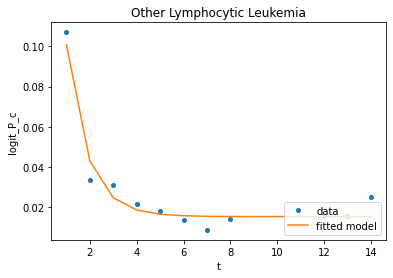

                   cause_name         a         b         c
0  Other Lymphocytic Leukemia  2.096645  1.420001 -4.155349


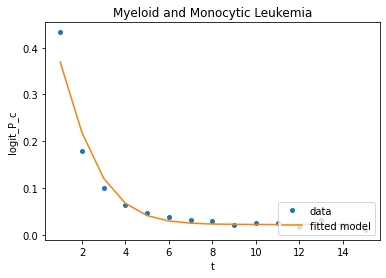

                       cause_name         a         b         c
0  Myeloid and Monocytic Leukemia  5.315026  0.756914 -3.810659


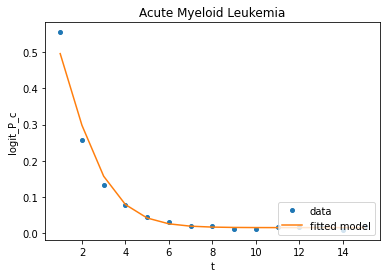

               cause_name         a         b         c
0  Acute Myeloid Leukemia  5.845505  0.851347 -4.147956


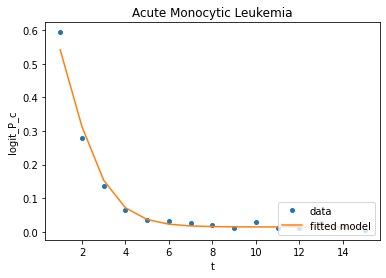

                 cause_name         a         b         c
0  Acute Monocytic Leukemia  5.546884  0.971158 -4.258109


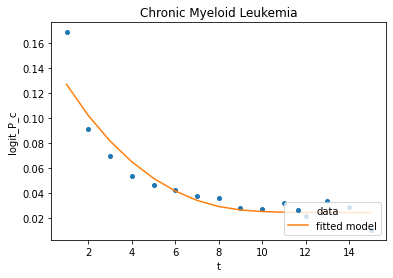

                 cause_name         a         b         c
0  Chronic Myeloid Leukemia  8.129888  0.246933 -3.686652


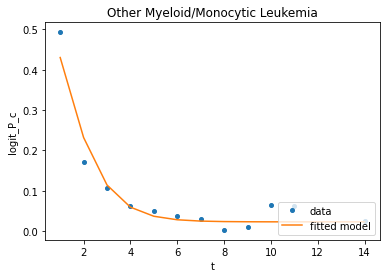

                         cause_name         a         b         c
0  Other Myeloid/Monocytic Leukemia  4.578487  0.959857 -3.741678


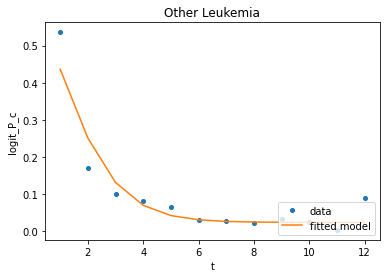

       cause_name         a         b         c
0  Other Leukemia  4.969472  0.863509 -3.700143


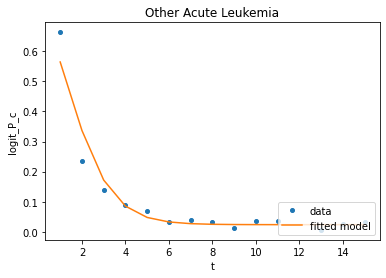

             cause_name         a         b        c
0  Other Acute Leukemia  5.108796  0.962159 -3.71078


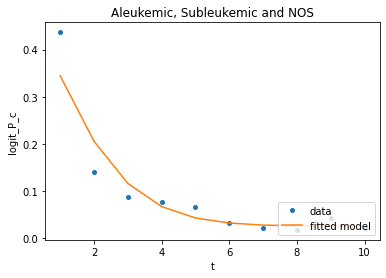

                       cause_name         a         b         c
0  Aleukemic, Subleukemic and NOS  5.167602  0.729652 -3.695848


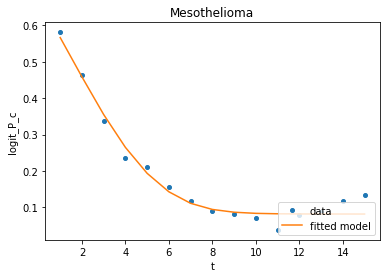

     cause_name         a         b         c
0  Mesothelioma  7.165318  0.434878 -2.414888


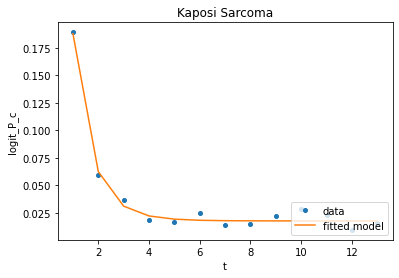

       cause_name         a         b         c
0  Kaposi Sarcoma  1.812209  2.156969 -4.009626


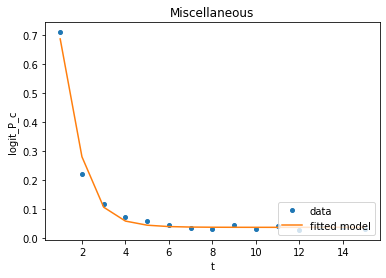

      cause_name         a         b        c
0  Miscellaneous  2.471678  2.388972 -3.22288


In [11]:
parameters = pd.DataFrame(columns = ['cause_name', 'a','b','c'])
for cancer in df.cause_name.unique():
    #for age in with_P_c_no_inf.age_name.unique():
        #cancer = "All Sites"
        #ages = "All Ages"

        data = df[df['cause_name']==cancer]
        #data = data[data['age_name']==age]


        t=data['t']
        y=data['logit_P_c']
        res_lsq = least_squares(model, x_0, args=(t,y), loss='linear')        
        # other loss functions to try:
        # soft_l1, cauchy
        #weights

        # PLOT
        output = function(res_lsq.x, t)
        plt.plot(t, scipy.expit(y), 'o', markersize=4, label='data')
        plt.plot(t, scipy.expit(output), label='fitted model')
        plt.xlabel("t")
        plt.ylabel("logit_P_c")
        plt.legend(loc='lower right')
        plt.title(cancer)#+": a ="+str(res_lsq.x[0])+" b ="+str(res_lsq.x[1])+" c ="+str(res_lsq.x[2]))
        plt.show()
        
        # SAVE
        row = pd.DataFrame(data={'cause_name': [cancer],
              'a': [res_lsq.x[0]],
              'b': [res_lsq.x[1]],
              'c': [res_lsq.x[2]]})
        print(row)
        parameters = parameters.append(row, ignore_index = True)

In [ ]:
parameters.head()

In [12]:
parameters.to_csv('/homes/fed1/Survival_Franny/three_parameter_log_form_values_SEER_6_3_2021.csv', index=False)

## To do:

Try age group specific